In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
# Load IMDb datasets for movie ratings and basic movie information and store it in dataframe variables
imdb_ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', low_memory=False)

# Alternative way of loading the file
#title_basics = pd.read_csv('C:\Users\Zaki Georgetown\OneDrive\Desktop\Python Projects\Movie Rating Analysis\title.basics.tsv.gz', 
                           #sep='\t', 
                           #low_memory=False)

title_basics = pd.read_csv('title.basics.tsv.gz', sep='\t', low_memory=False)


In [3]:
#Display the first 5 rows of the ratings dataset
print(imdb_ratings.head())

      tconst  averageRating  numVotes
0  tt0000001            5.7      2015
1  tt0000002            5.7       272
2  tt0000003            6.5      1935
3  tt0000004            5.4       179
4  tt0000005            6.2      2706


In [4]:
#Check the column-wise info of the ratings dataset
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384137 entries, 0 to 1384136
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1384137 non-null  object 
 1   averageRating  1384137 non-null  float64
 2   numVotes       1384137 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.7+ MB


In [5]:
#Rename columuns and print first 5 rows again
imdb_ratings.columns = ["ID", "Average Rating", "Number of Ratings"]
print(imdb_ratings.head())

          ID  Average Rating  Number of Ratings
0  tt0000001             5.7               2015
1  tt0000002             5.7                272
2  tt0000003             6.5               1935
3  tt0000004             5.4                179
4  tt0000005             6.2               2706


In [6]:
#Check if there are any titles that don't have ratings
imdb_ratings.isnull().sum()

ID                   0
Average Rating       0
Number of Ratings    0
dtype: int64

In [7]:
f'If this number {len(imdb_ratings["ID"].unique())} is equal to {imdb_ratings["ID"].count()}, then all the titles rated in this dataset are unique.'

'If this number 1384137 is equal to 1384137, then all the titles rated in this dataset are unique.'

In [8]:
imdb_ratings['Average Rating'].value_counts()

Average Rating
7.2    52082
7.4    49813
7.6    49539
7.8    48651
7.0    47738
       ...  
1.5      442
1.4      392
1.2      385
1.1      303
1.3      277
Name: count, Length: 91, dtype: int64

In [9]:
imdb_ratings['Average Rating'].describe()

count    1.384137e+06
mean     6.957823e+00
std      1.384182e+00
min      1.000000e+00
25%      6.200000e+00
50%      7.200000e+00
75%      7.900000e+00
max      1.000000e+01
Name: Average Rating, dtype: float64

<Axes: >

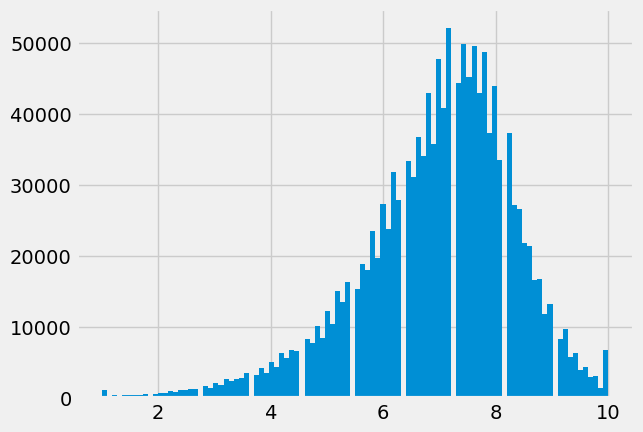

In [10]:
imdb_ratings['Average Rating'].hist(bins=100)

In [11]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [12]:
title_basics.columns = ["ID", "Title Type", "Primary Title", "Original Title", "Is Adult", "Start Year", "End Year", "Runtime (minutes)", "Genres"]
title_basics

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10432626,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10432627,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10432628,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10432629,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [13]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10432631 entries, 0 to 10432630
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   ID                 object
 1   Title Type         object
 2   Primary Title      object
 3   Original Title     object
 4   Is Adult           object
 5   Start Year         object
 6   End Year           object
 7   Runtime (minutes)  object
 8   Genres             object
dtypes: object(9)
memory usage: 716.4+ MB


In [14]:
title_basics.describe()

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
count,10432631,10432631,10432614,10432614,10432631,10432631,10432631,10432631,10432613
unique,10432631,11,4683306,4706350,12,153,96,940,2358
top,tt0000001,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,Drama
freq,1,7969517,50018,50018,10101701,1388747,10316202,7268233,1195407


In [15]:
#Convert Numerical Columns, coerce converts any conversion errors into NaN values, astype("Int64") converts values back to integer type explicitly
title_basics['Start Year'] = pd.to_numeric(title_basics['Start Year'], errors='coerce').astype('Int64')
title_basics['End Year'] = pd.to_numeric(title_basics['End Year'], errors='coerce').astype('Int64')
title_basics['Runtime (minutes)'] = pd.to_numeric(title_basics['Runtime (minutes)'], errors='coerce')

In [16]:
title_basics.isnull().sum()

ID                          0
Title Type                  0
Primary Title              17
Original Title             17
Is Adult                    0
Start Year            1388747
End Year             10316202
Runtime (minutes)     7268251
Genres                     18
dtype: int64

In [17]:
title_basics

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5.0,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,4.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1.0,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10432626,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,<NA>,NaN,"Action,Drama,Family"
10432627,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,<NA>,NaN,"Action,Drama,Family"
10432628,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,<NA>,NaN,"Action,Drama,Family"
10432629,tt9916856,short,The Wind,The Wind,0,2015,<NA>,27.0,Short


In [19]:
# Counting the number of occurrences of each unique value in the 'Is Adult' column
unique_value_counts = title_basics['Is Adult'].value_counts()

# Printing the counts
print(unique_value_counts)


Is Adult
0       10101701
1         330912
2023           6
2019           3
2020           2
1981           1
2017           1
\N             1
2022           1
2011           1
2014           1
2005           1
Name: count, dtype: int64


In [ ]:
# Replace values that are not '0' or '1' with NaN
title_basics['Is Adult'] = pd.to_numeric(title_basics['Is Adult'], errors='coerce')

# Any value that is not 0 or 1 is now NaN. Convert the column to boolean
# NaN values will remain as NaN
title_basics['Is Adult'] = title_basics['Is Adult'].map({0: False, 1: True})

# Check the unique values again
print(title_basics['Is Adult'].unique())

# Check the DataFrame
print(title_basics)

In [ ]:
#Finding the number of unique values in the start year column that aren't years

#Create a copy of the Star Year column in string format
start_year_as_string  = title_basics['Start Year'].astype(str)

# Filer out four-digit numbers from the column
non_four_digit_years = start_year_as_string.apply(lambda x: x if len(x) != 4 else None)

#Count the unique values that aren't years (four-digit values)

non_four_digit_year_counts = non_four_digit_years.value_counts(dropna=True)

print(non_four_digit_years_counts)

In [ ]:
# Find the number of unique types of films
count_unique_filmtypes = title_basics['Title Type'].value_counts()
print(count_unique_filmtypes)

In [ ]:
# filter movie_basics df to include only rows where the Title Type column has values 'movie' or 'tvMovie'
filtered_movies = title_basics[title_basics['Title Type'].isin(['movie', 'tvMovie'])]

# Check the first few rows of the filtered DataFrame
print(filtered_movies.head())

In [ ]:
filtered_movies.isnull().sum()

In [ ]:
#Since we already have primary title we can remove the original title column 
#End Year column can be deleted as well as we are only looking at movies and no TV shows are include

#Drop the "Original Title" and "End Year" columns (axis=1 indicates that columns are being dropped not rows and inplace=True marks changes to the datafram as permenant)

filtered_movies = filtered_movies.drop(['Original Title', 'End Year'], axis=1)


In [ ]:
filtered_movies.info()

In [ ]:
filtered_movies

In [ ]:
#Keep only movies with a known start year
filtered_movies = filtered_movies.dropna(subset=['Start Year'])

#Keep movies that have a title
filtered_movies = filtered_movies[filtered_movies['Primary Title'].notna()] 

filtered_movies.info()
filtered_movies.isnull().sum()

In [ ]:
# Finding the number of genres in the table
unique_genres = filtered_movies['Genres'].unique()
print(len(unique_genres))

In [ ]:
# Filter out rows where 'Genres' column has '\N'
filtered_movies = filtered_movies[filtered_movies['Genres'] != '\\N']

filtered_movies.info()

In [ ]:
merged_df = pd.merge(filtered_movies, imdb_ratings, on="ID", how='inner')
merged_df

In [ ]:
# Set display format to suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

#get stats on the number of ratings to determine the minimum number of ratings to filter in your analysis
merged_df['Number of Ratings'].describe()

In [ ]:
plt.boxplot(merged_df['Number of Ratings'].dropna())
plt.title("Box Plot of Number of Ratings")
plt.ylabel("Number of Ratings")
plt.show()

In [ ]:
#####THIS HAS A HUGE INFLUENCE ON THE RESULTS AS IT CAN SKEW THE DISTRIBUTION OF DATA SO USE A MINIMUM NUMBER OF RATINGS THAT IS REASONABLE
# filter the "Number of Ratings" column to only include movies with at least 50 ratings
merged_df = merged_df[merged_df['Number of Ratings'] >= 300]

merged_df


In [ ]:
merged_df.isnull().sum()

In [ ]:
#Since we need the runtime of the movies and less than 10% of the movie in our dataset don't have runtime values, we can exclude the movies without runtimes
merged_df = merged_df.dropna(subset=['Runtime (minutes)'])

merged_df.info()


In [ ]:
#Display the top 10 movies with the highest average ratings
merged_df.sort_values(by="Average Rating", ascending=False).head(10)

In [ ]:
#Display the top 10 movies with the highest number of votes
merged_df.sort_values(by="Number of Ratings", ascending=False).head(10)

In [ ]:
#Finding the oldest and newest movie in the dataset by year
merged_df_sorted = merged_df.sort_values(by="Start Year", ascending=True)

oldest_movie = merged_df_sorted.iloc[0]
newest_movie = merged_df_sorted.iloc[-1]

print("Oldest Movie:")
print(oldest_movie)
print("\nNewest Movie:")
print(newest_movie)

In [ ]:
#Looking at correlation between the different numberical columns
numeric_cols = merged_df.select_dtypes(include=[np.number])
numeric_cols.corr()


In [ ]:
#Group movies by year and find the mean runtime, average rating and number of ratings for each year
yearly_avg_ratings = numeric_cols.groupby("Start Year").mean()

yearly_avg_ratings

In [ ]:
yearly_avg_ratings.sort_values("Average Rating", ascending=False)

In [ ]:
yearly_avg_ratings["Number of Ratings"].plot(kind='line')

plt.figure(figsize=(8, 4))
plt.title("Number of Ratings Over Time")
plt.xlabel("Year")
plt.ylabel('Average number of rating')

In [ ]:
#Exploding genres to analyze the data by individual genres later

#create a copy of merged_df and name it merged_df2
merged_df2 = merged_df.copy()

# Split the 'Genres' column into a list of genres

merged_df2['Genres'] = merged_df2['Genres'].str.split(',')

# Explode the genres list into individual rows
exploded_genres_df = merged_df2.explode('Genres')

# Now, you can perform analyses on the exploded_genres_df DataFrame
# For example, to get the mean rating for each genre:
genre_mean_ratings = exploded_genres_df.groupby('Genres')['Average Rating'].mean()
genre_mean_ratings

In [ ]:
exploded_genres_df

In [ ]:
len(exploded_genres_df['Genres'].unique())

In [ ]:
# Add a column indicating the decade in which the movie was released

#Get the decade of the movie
def decade_generator(year):
    return (year //10) * 10

#Add the decade columnm to the data frame

exploded_genres_df["Decade"]= exploded_genres_df["Start Year"].apply(decade_generator)


In [ ]:
exploded_genres_df

In [ ]:
# Group by 'Genres' and 'Start Year' and calculate the mean rating
genre_year_avg_rating = exploded_genres_df.groupby(['Genres', 'Start Year'])['Average Rating'].mean()

# Pivot the table for better readability (optional)
pivot_table = genre_year_avg_rating.unstack(level=0)

print(pivot_table)

In [ ]:
#Selecting a subset of genres for analysis

selected_genres = ['Drama', 'Comedy', 'Action', 'Romance', 'Sci-Fi']  

# Filter the pivot table to include only the selected genres
filtered_pivot_table = pivot_table[selected_genres]



In [ ]:
#plotting with all genres
#pivot_table.plot(kind='line', figsize=(15, 8))

#plotting results with subset of genres
filtered_pivot_table.plot(kind='line', figsize=(15, 8))


# Adding labels and title for clarity
plt.xlabel('Start Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating by Genre Over Years')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
#Calculate the correlation of ratings for each genres compared to the overall rating average over time. 
#--> could be one insight you found

In [ ]:
#Export the movies with ratings dataframe to a CSV file for data visualization in Tableau

exploded_genres_df.to_csv('IMDb_movie_ratingsv2.csv', index=False)

In [ ]:
# Make another csv file but just with tv shows this time

In [ ]:
#For exploratory analysis, you can group by year and genre, and adult movie --> could potentially import another dataset and have a look by countriy, region etc